In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
audible_data = pd.read_csv("C:/Users/HP/Downloads/audible_amazon/audible_uncleaned.csv")

In [4]:
audible_data.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [6]:
data_types = audible_data.dtypes
data_types

name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object

# Constations
* author- "Writtenby:" can be removed; multiple author names can be placed in different columns.

* narrator- "Narratedby:" can be removed.

* time- is of type str; can be converted to numeric or datetime type.

* releasedate- is of type str; should be of type date.

* language- all values should be in uniform case; first letter capital, rest smallcase.

* stars- can be split into i) number of stars and ii) total number of ratings columns.

* price- is of type str; should be float.

In [7]:
#information about the data
audible_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [8]:
#stats
audible_data.describe()

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


## Checking total count of each category

In [9]:
#checking number of occurances of books
book_counts = audible_data['name'].value_counts()
#list out books which have 10 or more occurances
book_counts[book_counts >= 10]

name
The Art of War                 20
Sterling Biographies           19
The Odyssey                    16
Sterling Point Books           16
Hamlet                         15
The Prophet                    14
Pride and Prejudice            14
A Christmas Carol              14
The Iliad                      13
As a Man Thinketh              13
The Science of Getting Rich    13
The Picture of Dorian Gray     12
Abraham Lincoln                12
Meditations                    11
The Richest Man in Babylon     11
The Raven                      11
The Prince                     11
Unstoppable                    10
Name: count, dtype: int64

In [10]:
#checking number of occurances of author
author_counts = audible_data['author'].value_counts()
#list out author which have 100 or more occurances
author_counts[author_counts >= 100]

author
Writtenby:矢島雅弘,石橋遊                         874
Writtenby:SmartReading                     405
Writtenby:中西貴之,BJ                          311
Writtenby:div.                             274
Writtenby:OnlineStudioProductions          212
Writtenby:WilliamShakespeare               201
Writtenby:BillBrown                        198
Writtenby:J.M.Gardner                      174
Writtenby:InnovativeLanguageLearning       167
Writtenby:GertrudeChandlerWarner           160
Writtenby:iMinds                           135
Writtenby:ThomasRike                       131
Writtenby:N.N.                             124
Writtenby:志麻絹依                             123
Writtenby:InnovativeLanguageLearningLLC    115
Writtenby:HansChristianAndersen            112
Writtenby:OneMediaiPLTD                    110
Writtenby:DickSutphen                      109
Writtenby:高橋御山人                            100
Name: count, dtype: int64

## Checking number of duplicate rows

In [11]:
audible_data.duplicated().sum()

0

## Checking for missing values

In [12]:
audible_data.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [13]:
is_empty = audible_data.empty
is_empty

False

## Cleaning author column

In [14]:
#removing "Writtenby:"

audible_data['author'] = audible_data['author'].str.replace(pat = "Writtenby:", repl = "")

#after removing "Written By", author column looks like:

audible_data.author.sample(5)

26223        GeoffreyGray
69895    ConcettaBertoldi
1988        LisaJ.Amstutz
51291         ShusakuEndo
43633            AnnMcMan
Name: author, dtype: object

In [15]:
#Adding space between the first, middle and last names of Authors.

audible_data['author'] = audible_data['author'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)

#preview

audible_data.author.sample(5)

41582               R.B.Lewis
71186        Lisa Renee Jones
83232            Clare Atkins
54793             Lulu Taylor
36214    Seth J.Gillihan Ph D
Name: author, dtype: object

In [16]:
audible_data2 = pd.concat( [audible_data['name'], 
                            #splits author into author1, author2 and author3.
                            audible_data['author'].str.split(',', expand = True).add_prefix('author'),
                            audible_data.loc[:,['narrator', 'time', 'releasedate', 'language', 'stars', 'price']]], 
                            axis = 1)

In [17]:
audible_data2.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,None,None,None,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,None,None,None,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,None,None,None,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,None,None,None,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,None,None,None,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


## New Empty values in author_i columns

In [18]:
#number of missing values in author columns
audible_data2.loc[:,['author0','author1','author2','author3']].isnull().sum()

author0        0
author1    73762
author2    85135
author3    86713
dtype: int64

## Cleaning narrator column

In [19]:
#removing "Narratedby:" from Narrator column

audible_data2['narrator'] = audible_data2['narrator'].str.replace(pat = "Narratedby:", repl = "")

#adding space between first and last name of the Narrator

audible_data2['narrator'] = audible_data2['narrator'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)

In [20]:
#preview of the dataset so far
audible_data2.tail(5)

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
87484,Last Days of the Bus Club,Chris Stewart,None,None,None,Chris Stewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,None,None,None,Robert Fass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,None,None,None,Flo Gibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,None,None,None,Anton Lesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00
87488,Havana,Mark Kurlansky,None,None,None,Fleet Cooper,6 hrs and 1 min,07-03-17,English,Not rated yet,569.00


## Cleaning time comumn

### Understanding the different formats present in the strings of time column:

In [21]:
time_column = audible_data2['time']

#replacing all numbers with blanks

time_column = time_column.str.replace(pat = r'[0-9]', repl = '', regex = True)

#keeping only unique patterns

time_column.drop_duplicates()


0           hrs and  mins
4                     hrs
12           hrs and  min
29           hr and  mins
53                   mins
227                    hr
255           hr and  min
1203                  min
1401    Less than  minute
Name: time, dtype: object

**transformations to do**
*  All rows with Less than xx minutes will be replaced with xx minutes.
* Since only 1 unique value must be present, less than 1 minute can be simply replaced by '1'.
* If other values are present like less than 5 minutes, less than 10 mins etc., then we would use regular expressions to extract and store the digits.
* we have to split the time comumn to hour_component and min_component

In [22]:
#finding rows with "less than x minute" values in audiobook duration

less_than_duration = audible_data2[audible_data2.time.str.contains(pat = 'less than', case = False)].index

#checking all unique values with 'less than' pattern

audible_data2.time[less_than_duration].drop_duplicates()

1401    Less than 1 minute
Name: time, dtype: object

### Separating time column into hour_component and min_component

In [23]:
#creating 2 columns- 1 for hour component and the other for minute component.

audible_data2['hour_component'] = 0

audible_data2['min_component'] = 0

In [24]:
#Extracting the hour component of audiobook duration into hour column and minute into min_component column

audible_data2['hour_component'] = audible_data2.time.str.extract(pat = r'^(\d+) hr')

audible_data2['min_component'] = audible_data2.time.str.extract(pat = r'(\d+) min')

In [25]:
#preview of extracted time

audible_data2.loc[:,['time', 'hour_component', 'min_component']].sample(5)

,time,hour_component,min_component
27169,7 hrs and 12 mins,7,12
22487,22 hrs and 18 mins,22,18
70991,9 hrs and 1 min,9,1
40227,1 hr and 13 mins,1,13
28185,3 hrs and 40 mins,3,40


### Cleaning newly created missing values

In [26]:
#converting all NaN values in hour and minute component column to 0

audible_data2['hour_component'] = audible_data2['hour_component'].fillna(0)

audible_data2['min_component'] = audible_data2['min_component'].fillna(0)

In [27]:
#sample preview-- a few random indices to show how values are tranformed

audible_data2.loc[[328,5532,1583], ['time', 'hour_component', 'min_component']]

,time,hour_component,min_component
328,11 mins,0,11
5532,12 mins,0,12
1583,5 mins,0,5


In [28]:
audible_data2.dtypes

name              object
author0           object
author1           object
author2           object
author3           object
narrator          object
time              object
releasedate       object
language          object
stars             object
price             object
hour_component    object
min_component     object
dtype: object

### Converting types 

In [29]:
#converting the hour and min column to int type

audible_data2 = audible_data2.astype({'hour_component':'int','min_component':'int'})

In [30]:
audible_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            87489 non-null  object
 1   author0         87489 non-null  object
 2   author1         13727 non-null  object
 3   author2         2354 non-null   object
 4   author3         776 non-null    object
 5   narrator        87489 non-null  object
 6   time            87489 non-null  object
 7   releasedate     87489 non-null  object
 8   language        87489 non-null  object
 9   stars           87489 non-null  object
 10  price           87489 non-null  object
 11  hour_component  87489 non-null  int32 
 12  min_component   87489 non-null  int32 
dtypes: int32(2), object(11)
memory usage: 8.0+ MB


## Cleaning date column

In [31]:
audible_data2.releasedate.sample(5)

69290    18-06-19
28613    02-04-13
77790    25-02-20
22396    06-08-19
58022    08-10-19
Name: releasedate, dtype: object

### checking  for inconsistencies

In [32]:
#day component- dd

#checking if any value in day part > 31.

any(audible_data2.releasedate.str.extract(pat = r'^(\d+)-').drop_duplicates().astype(int) > 31)

False

In [33]:
#check for inconsistencies in month of release date

#Check to see whether middle values (months) contain any number > 12

#all unique months.

any((audible_data2.releasedate.str.extract(pat = r'-(\d+)-').drop_duplicates()).astype(int) > 12)

False

In [49]:
#check inconsistencies in year value of release date

#future release date is also present, hence values 25 for year 2025, 24 for year 2024...

audible_data2.releasedate.str.extract(pat = r'-(\d+)$').drop_duplicates()

,0
0,08
1,18
2,20
3,21
4,10
6,14
7,17
9,19
11,11
16,04


### Converting type from string to date

In [34]:
#converting release-date from string to date type

audible_data2.releasedate = pd.to_datetime(audible_data2.releasedate, format = '%d-%m-%y')

#checking data types again

audible_data2.dtypes

name                      object
author0                   object
author1                   object
author2                   object
author3                   object
narrator                  object
time                      object
releasedate       datetime64[ns]
language                  object
stars                     object
price                     object
hour_component             int32
min_component              int32
dtype: object

In [35]:
audible_data2.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price,hour_component,min_component
0,Geronimo Stilton #11 & #12,Geronimo Stilton,None,None,None,Bill Lobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.00,2,20
1,The Burning Maze,Rick Riordan,None,None,None,Robbie Daymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,13,8
2,The Deep End,Jeff Kinney,None,None,None,Dan Russell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.00,2,3
3,Daughter of the Deep,Rick Riordan,None,None,None,Soneela Nankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.00,11,16
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,None,None,None,Jesse Bernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,10,0


## Cleaning language column

In [36]:
#language column

print(audible_data2.language.drop_duplicates().tolist())

['English', 'Hindi', 'spanish', 'german', 'french', 'catalan', 'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew', 'russian', 'polish', 'galician', 'afrikaans', 'icelandic', 'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian', 'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean', 'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian', 'telugu', 'lithuanian']


In [37]:
#making language names uniform by capitalizing the first letter.

audible_data2.language = audible_data2.language.str.title()

## Cleaning star column

**work to do**

Creating 2 columns out of the stars column:

   * stars_out_of_5- will contain numeric values like 2, 4.5 etc.
   * total_ratings- total number of reviews received on the particular audiobook.

In [38]:
audible_data2.stars.sample(5)

42191    5 out of 5 stars2 ratings
73449                Not rated yet
8083                 Not rated yet
87068                Not rated yet
85361                Not rated yet
Name: stars, dtype: object

In [39]:
#splitting stars column into 2
audible_data2[['stars_out_of_5', 'total_ratings']] = audible_data2.stars.str.split('stars', expand = True)

audible_data2.loc[:,['stars','stars_out_of_5', 'total_ratings']].head(4)

,stars,stars_out_of_5,total_ratings
0,5 out of 5 stars34 ratings,5 out of 5,34 ratings
1,4.5 out of 5 stars41 ratings,4.5 out of 5,41 ratings
2,4.5 out of 5 stars38 ratings,4.5 out of 5,38 ratings
3,4.5 out of 5 stars12 ratings,4.5 out of 5,12 ratings


In [40]:
#making a copy of df cleaned so far.
audible_data2_copy = audible_data2.copy()

In [41]:
#replacing 'out of 5' with ''
audible_data2.stars_out_of_5 = audible_data2.stars_out_of_5.str.replace(pat = ' out of 5', repl = '')

#replacing 'ratings' with ''
audible_data2.total_ratings = audible_data2.total_ratings.str.replace(pat = r' ratings| rating', repl = '', regex = True)

#removing ',' from ratings. e.g. 1,200 becomes 1200
audible_data2.total_ratings = audible_data2.total_ratings.str.replace(pat = ',', repl = '')

In [42]:
audible_data2.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price,hour_component,min_component,stars_out_of_5,total_ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,None,None,None,Bill Lobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.00,2,20,5,34
1,The Burning Maze,Rick Riordan,None,None,None,Robbie Daymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,13,8,4.5,41
2,The Deep End,Jeff Kinney,None,None,None,Dan Russell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.00,2,3,4.5,38
3,Daughter of the Deep,Rick Riordan,None,None,None,Soneela Nankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.00,11,16,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,None,None,None,Jesse Bernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,10,0,4.5,181


In [43]:
audible_data2['total_ratings'][audible_data2['total_ratings'].isna()]


34       None
50       None
51       None
61       None
62       None
         ... 
87484    None
87485    None
87486    None
87487    None
87488    None
Name: total_ratings, Length: 72417, dtype: object

In [44]:
#replacing 'Not rated yet' rows with NA

#rows with not yet rated value
not_rated_rows = audible_data2[audible_data2.stars_out_of_5.str.contains(pat = 'Not rated yet', case = False)].index
#replace 'Not yet rated' and 'None' with NA
audible_data2.loc[not_rated_rows,['stars_out_of_5', 'total_ratings']] = np.nan

In [45]:
#convert both columns to float type
audible_data2 = audible_data2.astype({'stars_out_of_5':'float', 'total_ratings':'float'})

In [46]:
audible_data2.dtypes

name                      object
author0                   object
author1                   object
author2                   object
author3                   object
narrator                  object
time                      object
releasedate       datetime64[ns]
language                  object
stars                     object
price                     object
hour_component             int32
min_component              int32
stars_out_of_5           float64
total_ratings            float64
dtype: object

In [47]:
#replacing NaN with 0

audible_data2.loc[not_rated_rows,['stars_out_of_5', 'total_ratings']] = 0

In [48]:
audible_data2.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price,hour_component,min_component,stars_out_of_5,total_ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,None,None,None,Bill Lobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.00,2,20,5.0,34.0
1,The Burning Maze,Rick Riordan,None,None,None,Robbie Daymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,13,8,4.5,41.0
2,The Deep End,Jeff Kinney,None,None,None,Dan Russell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.00,2,3,4.5,38.0
3,Daughter of the Deep,Rick Riordan,None,None,None,Soneela Nankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.00,11,16,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,None,None,None,Jesse Bernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,10,0,4.5,181.0


## Cleaning price column

In [49]:
values_with_letters = audible_data2.loc[audible_data2['price'].str.contains('[a-zA-Z]'), 'price'].unique()
print(values_with_letters)


['Free']


In [50]:
#converting price to float type

#replace 'free' with 0
audible_data2.price = audible_data2.price.str.replace(pat = 'free', repl = '0', case = False)

#removing ',' from the values
audible_data2.price = audible_data2.price.str.replace(pat = ',', repl = '')

#converting to float
audible_data2.price = audible_data2.price.astype(float)

In [51]:
audible_data2.dtypes

name                      object
author0                   object
author1                   object
author2                   object
author3                   object
narrator                  object
time                      object
releasedate       datetime64[ns]
language                  object
stars                     object
price                    float64
hour_component             int32
min_component              int32
stars_out_of_5           float64
total_ratings            float64
dtype: object

### Final adjustments

In [52]:
#renaming columns author0 to author1, author1 to author2 etc.

audible_data2.rename(columns = {'author0':'author_1', 'author1':'author_2', 'author2':'author_3', 'author3':'author_4',
                               'releasedate': 'release_date'}, inplace = True)

In [53]:
#final dataframe with relevant columns

cleaned_df = audible_data2.loc[:,['name', 'author_1', 'author_2', 'author_3', 'author_4', 'narrator', 'release_date',
                                 'hour_component', 'min_component', 'language', 'stars_out_of_5', 'total_ratings', 'price']]

In [54]:
cleaned_df.head(3)

,name,author_1,author_2,author_3,author_4,narrator,release_date,hour_component,min_component,language,stars_out_of_5,total_ratings,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,None,None,None,Bill Lobely,2008-08-04,2,20,English,5.0,34.0,468.0
1,The Burning Maze,Rick Riordan,None,None,None,Robbie Daymond,2018-05-01,13,8,English,4.5,41.0,820.0
2,The Deep End,Jeff Kinney,None,None,None,Dan Russell,2020-11-06,2,3,English,4.5,38.0,410.0


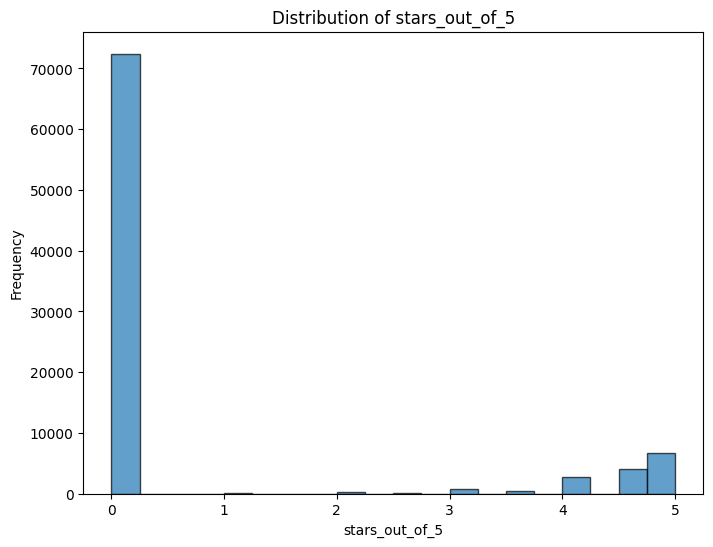

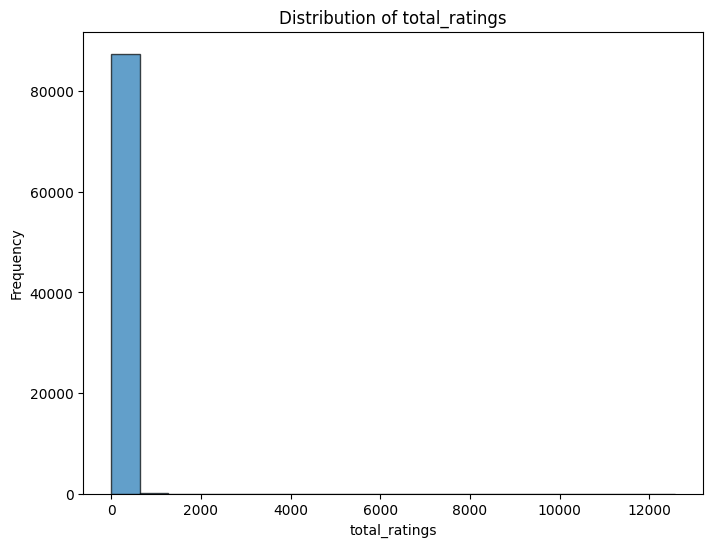

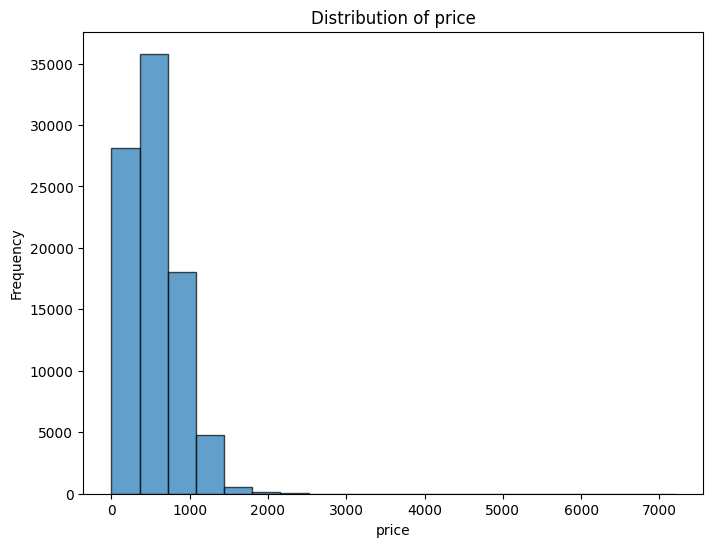

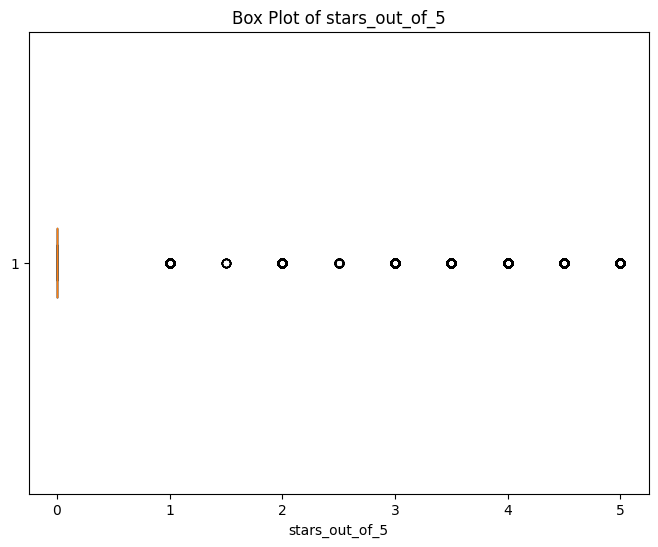

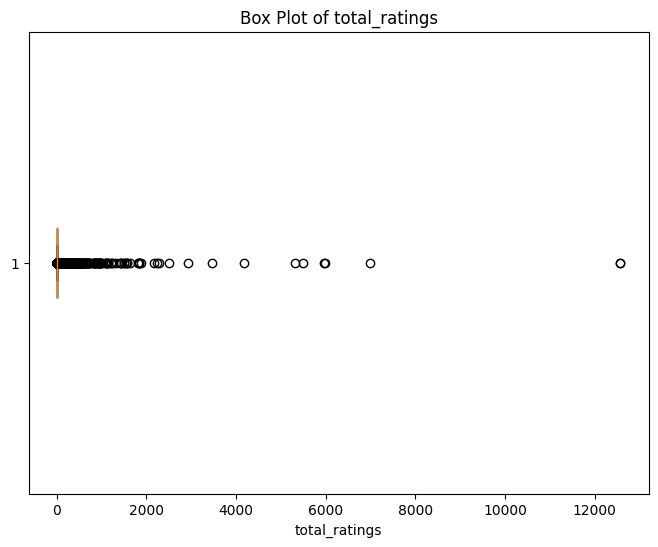

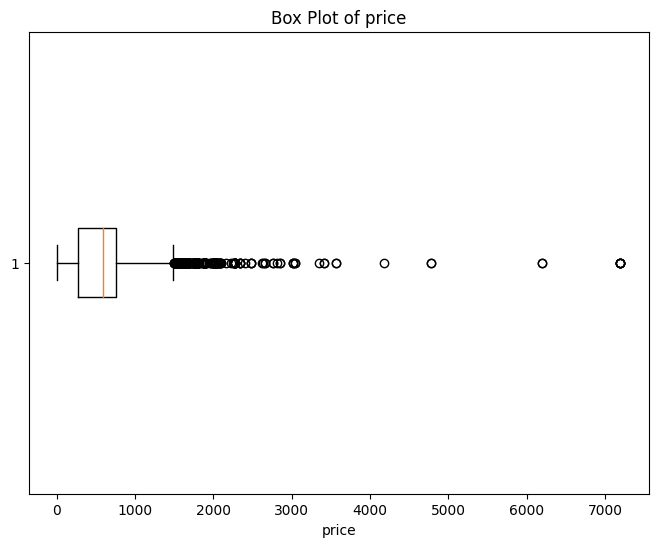

In [56]:
# Visualization - Distribution Plots

numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(cleaned_df[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualization - Box Plots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(cleaned_df[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()